In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
d = {'id':['1', '2', '3','1', '2', '3','7','8','9','10'], 
     'id1':['A','B','C','A','B','C','D','E','F','Gab'],
     'Column 1.1':[14, 15, 16,14, 15, 16,10, 10, 10,10], 
     'Column 1.2':[10, 10, 10,10,10, 10, 10,10,10,10], 
     'Column 1.3':[1, 4, 5,1, 4, 5,1, 4, 5,1], 
     'Column 2.1':[1, 2, 3,1, 2, 3,1, 2, 3,1], 
     'Column 2.2':[10, 10, 10,20,20,20,20,20,20,20], } 
  
# Converting dictionary into a data-frame  
df = pd.DataFrame(d) 
print(df) 

   Column 1.1  Column 1.2  Column 1.3  Column 2.1  Column 2.2  id  id1
0          14          10           1           1          10   1    A
1          15          10           4           2          10   2    B
2          16          10           5           3          10   3    C
3          14          10           1           1          20   1    A
4          15          10           4           2          20   2    B
5          16          10           5           3          20   3    C
6          10          10           1           1          20   7    D
7          10          10           4           2          20   8    E
8          10          10           5           3          20   9    F
9          10          10           1           1          20  10  Gab


##### Groupby on single column

In [28]:
df.groupby(['id']).mean()

,Column 1.1,Column 1.2,Column 1.3,Column 2.1,Column 2.2
id,,,,,
1,14,10,1,1,15
10,10,10,1,1,20
2,15,10,4,2,15
3,16,10,5,3,15
7,10,10,1,1,20
8,10,10,4,2,20
9,10,10,5,3,20


##### Groupby on single column and choose the column u want

In [29]:
df.groupby(['id'])['Column 1.1'].mean()

id
1     14
10    10
2     15
3     16
7     10
8     10
9     10
Name: Column 1.1, dtype: int64

##### Groupby on multiple column

In [30]:
df.groupby(['id','id1']).sum() # explore some arithmetic operations here

,,Column 1.1,Column 1.2,Column 1.3,Column 2.1,Column 2.2
id,id1,,,,,
1,A,28,20,2,2,30
10,Gab,10,10,1,1,20
2,B,30,20,8,4,30
3,C,32,20,10,6,30
7,D,10,10,1,1,20
8,E,10,10,4,2,20
9,F,10,10,5,3,20


##### Lambda Function

In [31]:
df['Column 1.1'].apply(lambda x: x*2)

0    28
1    30
2    32
3    28
4    30
5    32
6    20
7    20
8    20
9    20
Name: Column 1.1, dtype: int64

In [32]:
df['id1'].apply(lambda x: x.split('a'))

0       [A]
1       [B]
2       [C]
3       [A]
4       [B]
5       [C]
6       [D]
7       [E]
8       [F]
9    [G, b]
Name: id1, dtype: object

##### Pivot table in Python

In [50]:

pd.pivot_table(df,index=['id','id1'],values=["Column 1.1","Column 1.2"],aggfunc=np.sum)

,,Column 1.1,Column 1.2
id,id1,,
1,A,28,20
10,Gab,10,10
2,B,30,20
3,C,32,20
7,D,10,10
8,E,10,10
9,F,10,10


##### Read data from Excel

In [60]:
pd.read_excel("data_session4.xlsx")

,id,cat
0,1,A
1,1,A
2,1,A
3,1,A
4,1,A
5,1,A
6,1,A
7,1,A
8,1,A


In [61]:
xls = pd.ExcelFile("data_session4.xlsx")
df1 = pd.read_excel(xls, 'Sheet1')
df2 = pd.read_excel(xls, 'Sheet2')

In [63]:
print(df1)
#print(df2)

   id cat
0   1   A
1   1   A
2   1   A
3   1   A
4   1   A
5   1   A
6   1   A
7   1   A
8   1   A
   id cat
0   2   B
1   2   B
2   2   B
3   2   B
4   2   B
5   2   B
6   2   B
7   2   B
8   2   B


<h1><b><I>Inferential Statistics Application

In [20]:
import pandas as pd
data_infer = pd.read_csv("Movie.csv")
pd.set_option('display.max_columns',500)

In [21]:
data_infer.head()
print(data_infer.isnull().sum())
data_infer.fillna(data_infer.mean(),inplace=True)

data_infer.num_critic_for_reviews = data_infer.num_critic_for_reviews.astype(int)
data_infer.budget = data_infer.budget.astype(int)
data_infer.imdb_score = data_infer.imdb_score.astype(int)  
data_infer.profit = data_infer.profit.astype(int)  
data_infer.gross = data_infer.gross.astype(int)  
data_infer.dtypes
data_infer.head()

director_name             0
num_critic_for_reviews    1
gross                     0
genres                    0
actor_1_name              3
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
profit                    0
dtype: int64


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723,760,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237,2009,7,33000,523
1,Colin Trevorrow,644,652,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150,2015,7,150000,502
2,James Cameron,315,658,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200,1997,7,26000,458
3,George Lucas,282,460,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11,1977,8,33000,449
4,Steven Spielberg,215,434,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10,1982,7,34000,424


In [71]:
###### Correlation between Variables

In [5]:
correlation = data_infer.corr()
display(correlation)

,num_critic_for_reviews,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.473726,0.599578,0.572461,0.106965,0.392560,0.335442,0.701877,0.039165
gross,0.473726,1.000000,0.629267,0.553610,0.101240,0.044855,0.202876,0.367309,0.204977
num_voted_users,0.599578,0.629267,1.000000,0.782785,0.068379,0.016738,0.458800,0.519923,0.124334
num_user_for_reviews,0.572461,0.553610,0.782785,1.000000,0.073311,0.012617,0.308426,0.375121,0.096526
budget,0.106965,0.101240,0.068379,0.073311,1.000000,0.044367,0.034433,0.053338,-0.952983
title_year,0.392560,0.044855,0.016738,0.012617,0.044367,1.000000,-0.115795,0.293998,-0.029478
imdb_score,0.335442,0.202876,0.458800,0.308426,0.034433,-0.115795,1.000000,0.274404,0.027587
movie_facebook_likes,0.701877,0.367309,0.519923,0.375121,0.053338,0.293998,0.274404,1.000000,0.059416
profit,0.039165,0.204977,0.124334,0.096526,-0.952983,-0.029478,0.027587,0.059416,1.000000


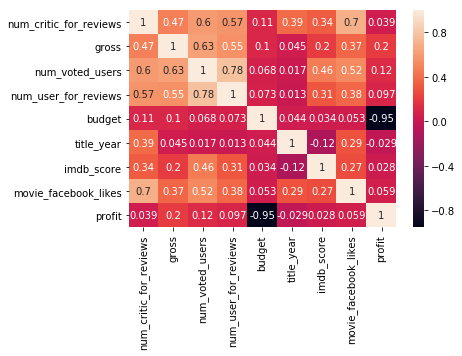

In [74]:
sns.heatmap(correlation,annot=True)

<b><I> <h1>Chi-Square Test</h1>Association between two variables</b><br>
Null Hypothesis: There are no association between two variables<br>
Alternative Hypothesis: There is association between two variables<br>
<h6> Often used when Target variable or Predicting variable is Category    

  

In [22]:
from scipy.stats import chi2_contingency

In [7]:
data_chi = pd.read_csv("sample_data.csv")
data_chi.head()

,Country,color,height,weight,citizen
0,A,Black,168,85,y
1,B,Black,164,96,y
2,C,Black,160,86,n
3,A,Black,161,54,n
4,B,Black,161,99,y


In [23]:
table = pd.crosstab(data_chi.color,data_chi.citizen)
display(table)
#tab1=np.array(table)


citizen,n,y
color,,
Black,2,7
White,9,6


In [10]:
stat, p, dof, expected = chi2_contingency(table)
print(stat,p,dof,expected)
# select significance value
alpha = 0.05
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

1.8909090909090907 0.16909942085258 1 [[4.125 4.875]
 [6.875 8.125]]
significance=0.1, p=0.2
Variables are not associated(fail to reject H0)


#####   <h1>ANOVA TESTING </h1>Association between continous and Non continous Variable
H0: No Association between two variables<br>
H1: Association between two variables

In [12]:
import scipy.stats as stats
#color ==> categoricaland for each value of this

In [13]:
stats.f_oneway(data_chi['height'][data_chi['color']=='Black'],data_chi['height'][data_chi['color']=='White'])

stats.f_oneway(data_chi['height'][data_chi['color']=='Black'],data_chi['height'][data_chi['color']=='White'])



F_onewayResult(statistic=0.022671063478977738, pvalue=0.8816876178966506)

<h4> Another Example

In [25]:
A = [12.6, 12, 11.8, 11.9, 13, 12.5, 14]
B = [10, 10.2, 10, 12, 14, 13]
C = [10.1, 13, 13.4, 12.9, 8.9, 10.7, 13.6, 12]
all_scores = A + B + C
company_names = (['A'] * len(A)) +  (['B'] * len(B)) +  (['C'] * len(C))
data = pd.DataFrame({'company': company_names, 'score': all_scores})
data.columns
data.company.value_counts()
data.head()

,company,score
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0


In [19]:
stats.f_oneway(data['score'][data['company']=='A'],data['score'][data['company']=='B'],data['score'][data['company']=='C'])


F_onewayResult(statistic=0.8212966923081559, pvalue=0.4556832940515236)

<h1> T-test</h1><br>
H0: mean of two variables are same<br>
H1: means are not same

In [124]:
stats.ttest_rel(data_chi.weight,data_chi.height)

Ttest_relResult(statistic=-27.904440930458303, pvalue=3.063110621332222e-19)

<h1>Z-test</h1><br>
H0:means of two variables are same<br>
H1: means are not same



In [129]:
from statsmodels.stats import weightstats as stests

ttest,pval =stests.ztest(data_chi.weight,data_chi.height)
pval
if(pval<0.05):
    print("Reject the null hypothesis")
else:
    print("Accept the NUll Hypotheiss")


Reject the null hypothesis
